In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer


#Reading data from Yelp Review Dataset
yelpdata = pd.read_csv('yelp.csv')
print(yelpdata)
length = len(yelpdata['text'])
print(length)

word_count = []
char_count = []
average_word_length = []
stopword_count = []
sorted_values = []
lower_case = []
word_count = yelpdata['text'].apply(lambda x: len(x.split()))
print("Words: ")
print(word_count)
yelpdata['word_count'] = word_count

char_count = yelpdata['text'].apply(lambda x: len(x))
print("Char Count: ")
print(char_count)
yelpdata['char_count'] = char_count

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8

In [2]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)

average_word_length = yelpdata['text'].apply(lambda x: average_words(x))
print("Average Word length: ")
print(average_word_length)
yelpdata['average_word_length'] = average_word_length

Average Word length: 
0       4.670968
1       4.225681
2       3.812500
3       4.486842
4       4.453488
5       4.663934
6       4.291096
7       4.460000
8       4.645161
9       4.500000
10      4.880000
11      4.457627
12      3.931034
13      4.657143
14      4.075949
15      4.426357
16      4.302920
17      3.727273
18      4.166667
19      4.746032
20      3.929204
21      3.952381
22      4.250000
23      4.000000
24      5.020408
25      4.000000
26      4.287356
27      4.339806
28      4.180412
29      5.027027
          ...   
9970    4.011765
9971    4.080645
9972    4.355263
9973    4.492063
9974    4.425287
9975    4.462366
9976    4.179775
9977    4.698225
9978    4.666667
9979    4.444444
9980    4.535211
9981    4.401235
9982    5.025000
9983    4.452229
9984    4.538206
9985    5.900000
9986    3.930233
9987    5.566667
9988    4.712644
9989    4.555556
9990    3.642857
9991    4.317647
9992    4.364754
9993    4.262500
9994    4.492997
9995    4.491667
9996    4

In [3]:
stop_words = stopwords.words('english')
len_stopwords = len(stop_words)
print(len_stopwords)
print(stop_words)
#yelpdata['stop_words'] = stop_words


stopword_count = yelpdata['text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
print("Stopword count: ")
print(stopword_count)
yelpdata['stopword_count'] = stopword_count


stopword_rate = (stopword_count / word_count)
print("Stopword rate: ")
print(stopword_rate)
yelpdata['stopword_rate'] = stopword_rate


sorted_values = yelpdata.sort_values(by=['stopword_rate'])
print(sorted_values)

yelpdata.describe()

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

,stars,cool,useful,funny,word_count,char_count,average_word_length,stopword_count,stopword_rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,131.039600,710.738700,4.452009,61.37870,0.452209
std,1.214636,2.067861,2.336647,1.907942,113.584114,617.399827,0.514986,54.58463,0.078763
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,54.000000,294.000000,4.200000,24.00000,0.423729
50%,4.000000,0.000000,1.000000,0.000000,101.000000,541.500000,4.390244,47.00000,0.464889
75%,5.000000,1.000000,2.000000,1.000000,173.000000,930.000000,4.614070,82.00000,0.500000
max,5.000000,77.000000,76.000000,57.000000,945.000000,4997.000000,27.600000,464.00000,0.700000


In [4]:
#Lowercase
lower_case = yelpdata['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))
yelpdata['lower_case'] = lower_case


In [5]:
#Removing punctuation
removed_punctuation = yelpdata['lower_case'].str.replace('[^\w\s]','')
yelpdata['punctuation_removal'] = removed_punctuation

cleaned_words = yelpdata['punctuation_removal'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
yelpdata['cleaned_words'] = cleaned_words

In [6]:
Lower_case_reviews = yelpdata['lower_case'].values[1]
print(Lower_case_reviews)

Punctuation_removed_reviews = yelpdata['punctuation_removal'].values[1]
print(Punctuation_removed_reviews)

cleaned_words_review = yelpdata['cleaned_words'].values[1]
print(cleaned_words_review)

i have no idea why some people give bad reviews about this place. it goes to show you, you can please everyone. they are probably griping about something that their own fault...there are many people like that. in any case, my friend and i arrived at about 5:50 pm this past sunday. it was pretty crowded, more than i thought for a sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. we were seated at 5:52 and the waiter came and got our drink orders. everyone was very pleasant from the host that seated us to the waiter to the server. the prices were very good as well. we placed our orders once we decided what we wanted at 6:02. we shared the baked spaghetti calzone and the small "here's the beef" pizza so we can both try them. the calzone was huge and we got the smallest one (personal) and got the small 11" pizza. both were awesome! my friend liked the pizza better and i liked the calzone 

In [7]:
#Removing other stop words
other_stop_words = ['get','told','would','week','us','test','right','left','one','even','also','go','asked']
print(len(other_stop_words))

13


In [8]:
#Cleaning reviews based on other stop words
clean_review=yelpdata['cleaned_words'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))
yelpdata['clean_review'] = clean_review

pd.set_option('display.max_columns', None)
cols=yelpdata.columns.tolist()
yelpdata.head()
print(cols)
clean_review = yelpdata['clean_review'].values[1]
print(clean_review)


['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny', 'word_count', 'char_count', 'average_word_length', 'stopword_count', 'stopword_rate', 'lower_case', 'punctuation_removal', 'cleaned_words', 'clean_review']
idea people give bad reviews place goes show please everyone probably griping something faultthere many people like case friend arrived 550 pm past sunday pretty crowded thought sunday evening thought wait forever seat said well seated girl comes back seating someone else seated 552 waiter came got drink orders everyone pleasant host seated waiter server prices good well placed orders decided wanted 602 shared baked spaghetti calzone small heres beef pizza try calzone huge got smallest personal got small 11 pizza awesome friend liked pizza better liked calzone better calzone sweetish sauce thats like sauce box part pizza take home door 642 everything great like bad reviewers goes show try things bad reviewers serious issues


In [9]:
#Lemmatizatoin of reviews
lemmatized_review = yelpdata['lemmatized'] = yelpdata['clean_review'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
yelpdata['lemmatized_review'] = lemmatized_review
lemmatized_review = yelpdata['lemmatized_review'].values[1]
print(lemmatized_review)

idea people give bad review place go show please everyone probably griping something faultthere many people like case friend arrived 550 pm past sunday pretty crowded thought sunday evening thought wait forever seat said well seated girl come back seating someone else seated 552 waiter came got drink order everyone pleasant host seated waiter server price good well placed order decided wanted 602 shared baked spaghetti calzone small here beef pizza try calzone huge got smallest personal got small 11 pizza awesome friend liked pizza better liked calzone better calzone sweetish sauce thats like sauce box part pizza take home door 642 everything great like bad reviewer go show try thing bad reviewer serious issue


In [10]:
from wordcloud import WordCloud

In [11]:
import matplotlib.pyplot as plt

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w      5   
12    h53YuCiIDfEFSJCQpk8v1g  2010-01-11  cGnKNX3I9rthE0-TH24-qA      5   
17    O510Re68mOy9dU490JTKCg  2010-05-03  j4SIzrIy0WrmW4yr4--Khg      5   
21    tdcjXyFLMKAsvRhURNOkCg  2011-06-28  LmuKVFh03Uz318VKnUWrxA      5   
22    eFA9dqXT5EA_TrMgbo03QQ  2011-07-13  CQYc8hgKxV4enApDkx0IhA      5   
24    JhupPnWfNlMJivnWB5d

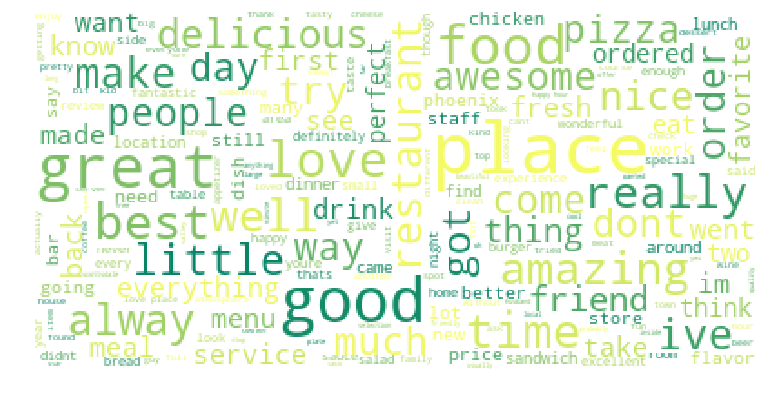

NEGATIVE REVIEWS


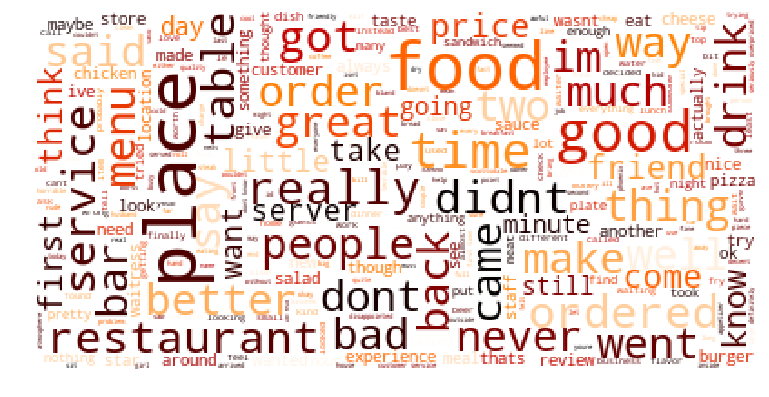

In [12]:
pos_df = yelpdata[yelpdata.stars== 5]
neg_df = yelpdata[(yelpdata.stars==1) | (yelpdata.stars==2)]
pos_df.head(3)
print(pos_df)

pos_words =[]
neg_words = []

for review in pos_df.lemmatized_review:
    pos_words.append(review)
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df.lemmatized_review:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

print ('POSITIVE REVIEWS')
wordcloud = WordCloud().generate(pos_words)
wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print ('NEGATIVE REVIEWS')
wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
yelpdata['lemmatized_review'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad review place go show plea...
2        love gyro plate rice good dig candy selection
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg detail ...
Name: lemmatized_review, dtype: object

In [14]:
yelpdata_class = yelpdata[(yelpdata['stars']==1) | (yelpdata['stars']==5)]
yelpdata_class.shape

#putting them in seperate variable
x = yelpdata_class['text']
y = yelpdata_class['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


In [20]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
yelpdata['length'] = yelpdata['text'].apply(len)
yelpdata.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,word_count,char_count,average_word_length,stopword_count,stopword_rate,lower_case,punctuation_removal,cleaned_words,clean_review,lemmatized,lemmatized_review,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155,889,4.670968,71,0.458065,my wife took me here on my birthday for breakf...,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...,wife took birthday breakfast excellent weather...,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257,1345,4.225681,134,0.521401,i have no idea why some people give bad review...,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,idea people give bad reviews place goes show p...,idea people give bad review place go show plea...,idea people give bad review place go show plea...,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16,76,3.812500,6,0.375000,love the gyro plate. rice is so good and i als...,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,love gyro plate rice good dig candy selection,love gyro plate rice good dig candy selection,love gyro plate rice good dig candy selection,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76,419,4.486842,33,0.434211,"rosie, dakota, and i love chaparral dog park!!...",rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...,rosie dakota love chaparral dog park convenien...,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86,469,4.453488,44,0.511628,general manager scott petello is a good egg!!!...,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,general manager scott petello good egg detail ...,general manager scott petello good egg detail ...,general manager scott petello good egg detail ...,469


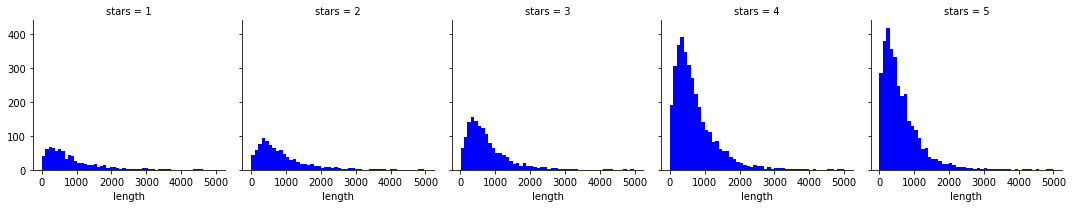

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
%matplotlib inline
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=yelpdata,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [25]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = yelpdata.groupby('stars').mean()
stval

,cool,useful,funny,word_count,char_count,average_word_length,stopword_count,stopword_rate,length
stars,,,,,,,,,
1,0.576769,1.604806,1.056075,153.953271,826.515354,4.409259,73.974633,0.468378,826.515354
2,0.719525,1.563107,0.875944,156.435814,842.256742,4.384048,75.067961,0.473357,842.256742
3,0.788501,1.306639,0.694730,140.714579,758.498289,4.379495,66.591376,0.462374,758.498289
4,0.954623,1.395916,0.670448,131.174135,712.923142,4.447161,60.959161,0.450164,712.923142
5,0.944261,1.381780,0.608631,114.463590,624.999101,4.517354,52.909799,0.440417,624.999101


In [26]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,cool,useful,funny,word_count,char_count,average_word_length,stopword_count,stopword_rate,length
cool,1.000000,-0.743329,-0.944939,-0.865362,-0.857664,0.665737,-0.880812,-0.854539,-0.857664
useful,-0.743329,1.000000,0.894506,0.697506,0.699881,-0.277302,0.708355,0.630750,0.699881
funny,-0.944939,0.894506,1.000000,0.847204,0.843461,-0.543185,0.858026,0.792305,0.843461
word_count,-0.865362,0.697506,0.847204,1.000000,0.999835,-0.881832,0.999276,0.988204,0.999835
char_count,-0.857664,0.699881,0.843461,0.999835,1.000000,-0.880262,0.998675,0.987233,1.000000
average_word_length,0.665737,-0.277302,-0.543185,-0.881832,-0.880262,1.000000,-0.873509,-0.910265,-0.880262
stopword_count,-0.880812,0.708355,0.858026,0.999276,0.998675,-0.873509,1.000000,0.989649,0.998675
stopword_rate,-0.854539,0.630750,0.792305,0.988204,0.987233,-0.910265,0.989649,1.000000,0.987233
length,-0.857664,0.699881,0.843461,0.999835,1.000000,-0.880262,0.998675,0.987233,1.000000


In [27]:
# CLASSIFICATION
data_classes = yelpdata[(yelpdata['stars']==1) | (yelpdata['stars']==3) | (yelpdata['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(5547, 22)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


In [28]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names()[19648])
print(vocab.get_feature_names()[10643])


31336
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8

In [30]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


In [31]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [37]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))
#Accuracy
from sklearn.metrics import accuracy_score
acc_naive = accuracy_score(y_test, predmnb)
print ('Accuracy = ', acc_naive)

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110

Accuracy =  0.7693693693693694


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))
#Accuracy
from sklearn.metrics import accuracy_score
acc_random = accuracy_score(y_test, predrmfr)
print ('Accuracy = ', acc_random)

/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Random Forest Classifier:
[[ 36  50  76]
 [  8 114 170]
 [ 10  59 587]]
Score: 66.4
Classification Report:               precision    recall  f1-score   support

           1       0.67      0.22      0.33       162
           3       0.51      0.39      0.44       292
           5       0.70      0.89      0.79       656

    accuracy                           0.66      1110
   macro avg       0.63      0.50      0.52      1110
weighted avg       0.65      0.66      0.63      1110

Accuracy =  0.663963963963964


In [39]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))
#Accuracy
from sklearn.metrics import accuracy_score
acc_decisiom = accuracy_score(y_test, preddt)
print ('Accuracy = ', acc_decisiom)

Confusion Matrix for Decision Tree:
[[ 61  48  53]
 [ 29 145 118]
 [ 39 104 513]]
Score: 64.77
Classification Report:               precision    recall  f1-score   support

           1       0.47      0.38      0.42       162
           3       0.49      0.50      0.49       292
           5       0.75      0.78      0.77       656

    accuracy                           0.65      1110
   macro avg       0.57      0.55      0.56      1110
weighted avg       0.64      0.65      0.64      1110

Accuracy =  0.6477477477477478


In [41]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))
#Accuracy
from sklearn.metrics import accuracy_score
acc_mpl = accuracy_score(y_test, predmlp)
print ('Accuracy = ', acc_mpl)

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 90  36  36]
 [ 19 189  84]
 [ 12  62 582]]
Score: 77.57
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.56      0.64       162
           3       0.66      0.65      0.65       292
           5       0.83      0.89      0.86       656

    accuracy                           0.78      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.78      0.77      1110

Accuracy =  0.7756756756756756


In [42]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))
#Accuracy
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, predsvm)
print ('Accuracy = ', acc_svm)

/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix for Support Vector Machines:
[[  0   0 162]
 [  0   0 292]
 [  0   0 656]]
Score: 59.1
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       292
           5       0.59      1.00      0.74       656

    accuracy                           0.59      1110
   macro avg       0.20      0.33      0.25      1110
weighted avg       0.35      0.59      0.44      1110

Accuracy =  0.590990990990991


/Users/priyankapatil/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


all_acc = (acc_naive, acc_random, acc_decisiom, acc_mpl, acc_svm)
print(all_acc)
model = ('Naive', 'Random Forest','decision Trees', 'MPL', 'SVM')
print(model)

In [49]:
all_acc = (acc_naive, acc_random, acc_decisiom, acc_mpl, acc_svm) 
print(all_acc) 
model = ('Multinomial Naive Bayes', 'Random Forest','Decision Tree', 'Multilayer Perceptron Classifier', 'SVM') 
print(model)

(0.7693693693693694, 0.663963963963964, 0.6477477477477478, 0.7756756756756756, 0.590990990990991)
('Multinomial Naive Bayes', 'Random Forest', 'Decision Tree', 'Multilayer Perceptron Classifier', 'SVM')


In [50]:
import pandas as pd
import numpy as np
all_acc = np.array(all_acc)
model = np.array(model)
dataset = pd.DataFrame({'model': model, 'all_acc': list(all_acc)},columns=['model','all_acc'])
print(dataset)


                              model   all_acc
0           Multinomial Naive Bayes  0.769369
1                     Random Forest  0.663964
2                     Decision Tree  0.647748
3  Multilayer Perceptron Classifier  0.775676
4                               SVM  0.590991


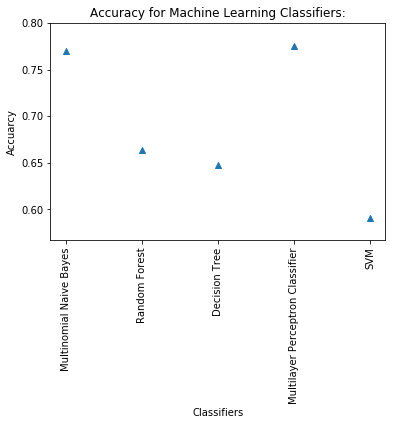

In [53]:
from matplotlib import pyplot as plt
plt.scatter(model,all_acc,marker='^')
plt.xticks(rotation='vertical')
plt.xlabel('Classifiers')
plt.ylabel('Accuarcy')
plt.title('Accuracy for Machine Learning Classifiers:')
plt.show()